In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
os.chdir('C:\\code\\activ')

In [3]:
df_name = 'nov_nine_var.xlsx'

In [4]:
path = "./documents/latent_vector/"

real_enc_out = pd.read_excel(path + 'real_enc.xlsx').iloc[:,1::]
basic_enc_out = pd.read_excel(path + 'basic_enc.xlsx').iloc[:,1::]
basic_form_enc_out = pd.read_excel(path + 'basic_formula_enc.xlsx').iloc[:,1::]
ae_enc_out = pd.read_excel(path + 'ae_formula_enc.xlsx').iloc[:,1::]
reinforce_enc_out = pd.read_excel(path + 'reinforce_enc.xlsx').iloc[:,1::]
dqn_enc_out = pd.read_excel(path + 'dqn_enc.xlsx').iloc[:,1::]
rein_gan_enc_out = pd.read_excel(path + 'reinforce_gan_enc.xlsx').iloc[:,1::]

In [5]:
ae_enc_out

,0,1,2
0,-0.110020,0.072733,-2.639783
1,-0.105883,0.068094,-2.600830
2,-0.102797,0.064285,-2.570822
3,-0.101367,0.062967,-2.555601
4,-0.098747,0.061405,-2.541785
...,...,...,...
995,0.128133,-0.028543,-0.074976
996,0.128748,-0.027067,-0.072616
997,-0.263229,-0.011139,-3.850780
998,0.129725,-0.027676,-0.073824


In [6]:
round_w = 4

basic = np.round(basic_enc_out.to_numpy(), round_w)
basic_form = np.round(basic_form_enc_out.to_numpy(), round_w)
reinforce = np.round(reinforce_enc_out.to_numpy(), round_w)
ae = np.round(ae_enc_out.to_numpy(), round_w)
dqn = np.round(dqn_enc_out.to_numpy(), round_w)
rein_gan = np.round(rein_gan_enc_out.to_numpy(), round_w)

all_result = [basic, basic_form, reinforce, ae, dqn, rein_gan]

In [7]:
union = []
for i in range(len(all_result)-1):
    union = np.union1d(union, np.intersect1d(all_result[i], all_result[i+1]))

union = np.unique(union)
union.shape

(345,)

In [8]:
import random as rand
saving = []
temp = []
for i in range(1000):
    for j in range(3):
        temp.append(union[rand.randrange(0, len(union))])
    saving.append(temp)
    temp = []

In [9]:
import tensorflow as tf

decoder = tf.keras.models.load_model('./model/decoder.h5')
decode_saving = decoder.predict(saving)

dnn_model = tf.keras.models.load_model('./model/dnn.h5')

32/32 [==============================] - 0s 2ms/step


In [10]:
from sklearn.preprocessing import MinMaxScaler
d = pd.read_excel('./documents/'+df_name).iloc[:,1:-1]
scaler = MinMaxScaler()
scaler.fit(d)

result = scaler.inverse_transform(decode_saving)

In [11]:
pop_result = dnn_model.predict(decode_saving)
df = np.append(result, pop_result, axis=1)

32/32 [==============================] - 0s 2ms/step


In [12]:
saving_pd = pd.DataFrame(df)
saving_pd.to_excel('./documents/result/ae_intersect_result.xlsx')

In [13]:
all_enc = [real_enc_out.iloc[-1], real_enc_out, basic_enc_out, basic_form_enc_out, ae_enc_out, reinforce_enc_out, dqn_enc_out, rein_gan_enc_out, saving]

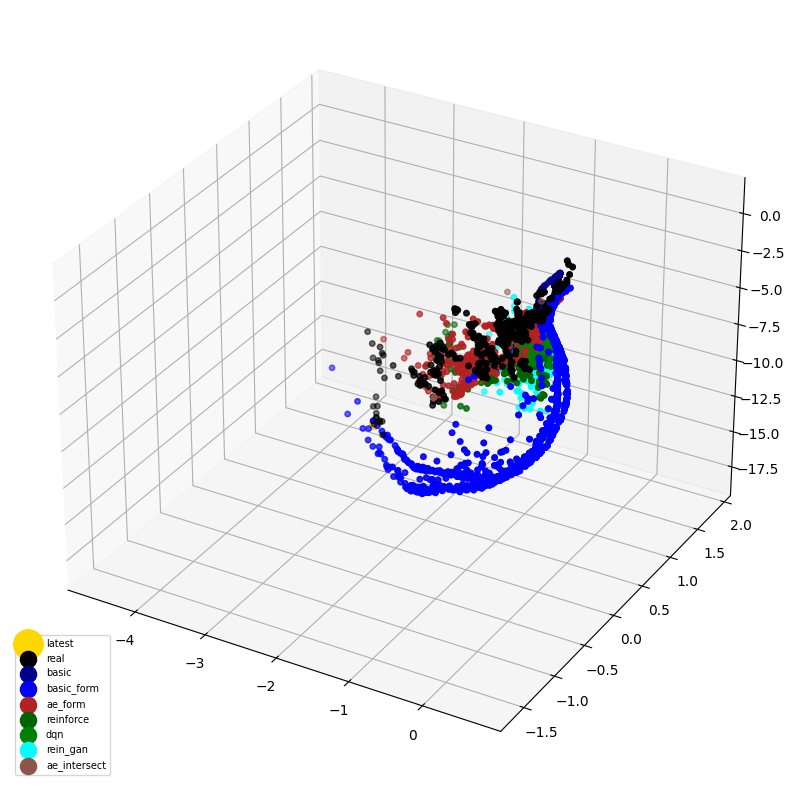

In [14]:
from matplotlib import animation

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

def init():
    c_l = ['gold', 'black', 'darkblue', 'blue', 'firebrick', 'darkgreen', 'green', 'cyan', 'tab:brown']
    lab = ['latest', 'real', 'basic', 'basic_form', 'ae_form', 'reinforce', 'dqn', 'rein_gan', 'ae_intersect']

    plt_l = []
    for i, enc in enumerate(all_enc):
        if i == 0:
            s = 50
        else:
            s = 15
        ax.scatter(enc[0], enc[1], enc[2], s=s, c=c_l[i])
    
    ax.legend(lab, loc="lower left", markerscale=3, fontsize=7)

    return fig, 

def animate(i):
    ax.view_init(elev=30., azim=i)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)
fig.savefig('./documents/fig/all_result.png')

In [15]:
anim.save('./documents/fig/all_result.gif', writer='pillow', fps=30)